# Segundo ensayo de LoginLogout

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import glob, os

In [5]:
log = pd.read_csv('LoginLogout_2312.csv', dtype={'Active Time': 'Float64'}, skipfooter=2, engine='python')
display(log.head(), log.tail())

FileNotFoundError: [Errno 2] No such file or directory: 'LoginLogout_2312.csv'

In [3]:
log.reset_index(inplace=True)
log.drop(labels=['index', 'Media Type'], axis='columns', inplace=True)

NameError: name 'log' is not defined

### Limpieza y ajuste de tipo de variables

In [96]:
log['Tenant Name'] = log['Tenant Name'].str.replace('ï¿½', 'Ñ')

log['Start Timestamp'] = pd.to_datetime(log['Start Timestamp'])
log['End Timestamp'] = pd.to_datetime(log['End Timestamp'])

log['fecha_inicio'] = log['Start Timestamp'].dt.date
log['tiempo_inicio'] = log['Start Timestamp'].dt.time
log['fecha_cierre'] = log['End Timestamp'].dt.date
log['tiempo_cierre'] = log['End Timestamp'].dt.time


In [97]:
log.head()

,Tenant Name,Agent Name,Start Timestamp,End Timestamp,Active Time,fecha_inicio,tiempo_inicio,fecha_cierre,tiempo_cierre
0,NUÑEZ FIGUEROA,KATHERINA ANDREA (KANUNEZF),2019-12-23 13:13:32,2019-12-23 16:31:56,11904.0,2019-12-23,13:13:32,2019-12-23,16:31:56
1,NUÑEZ FIGUEROA,KATHERINA ANDREA (KANUNEZF),2019-12-23 08:01:35,2019-12-23 12:06:36,14701.0,2019-12-23,08:01:35,2019-12-23,12:06:36
2,RAMOS RIVERAS,JUAN ALEXANDER (JARAMOSR),2019-12-23 20:01:58,2019-12-23 22:59:57,10679.0,2019-12-23,20:01:58,2019-12-23,22:59:57
3,RAMOS RIVERAS,JUAN ALEXANDER (JARAMOSR),2019-12-23 16:41:42,2019-12-23 19:28:45,10023.0,2019-12-23,16:41:42,2019-12-23,19:28:45
4,ASTETE SOTO,BARBARA ALEJANDRA (BAASTETS),2019-12-23 14:25:51,2019-12-23 16:30:10,7459.0,2019-12-23,14:25:51,2019-12-23,16:30:10


In [98]:
log['Intervalo'] = log['Start Timestamp'].dt.floor('30min')
log['users'] = log['Agent Name'].str.extract(r'(?<=.\()(\w+)')

In [99]:
columns = ['Agent Name', 'Tenant Name', 'users','Active Time', 'Start Timestamp', 'fecha_inicio', 'tiempo_inicio', 'End Timestamp', 'fecha_cierre', 'tiempo_cierre', 'Intervalo']
log = log.reindex(columns=columns)
log.head()

,Agent Name,Tenant Name,users,Active Time,Start Timestamp,fecha_inicio,tiempo_inicio,End Timestamp,fecha_cierre,tiempo_cierre,Intervalo
0,KATHERINA ANDREA (KANUNEZF),NUÑEZ FIGUEROA,KANUNEZF,11904.0,2019-12-23 13:13:32,2019-12-23,13:13:32,2019-12-23 16:31:56,2019-12-23,16:31:56,2019-12-23 13:00:00
1,KATHERINA ANDREA (KANUNEZF),NUÑEZ FIGUEROA,KANUNEZF,14701.0,2019-12-23 08:01:35,2019-12-23,08:01:35,2019-12-23 12:06:36,2019-12-23,12:06:36,2019-12-23 08:00:00
2,JUAN ALEXANDER (JARAMOSR),RAMOS RIVERAS,JARAMOSR,10679.0,2019-12-23 20:01:58,2019-12-23,20:01:58,2019-12-23 22:59:57,2019-12-23,22:59:57,2019-12-23 20:00:00
3,JUAN ALEXANDER (JARAMOSR),RAMOS RIVERAS,JARAMOSR,10023.0,2019-12-23 16:41:42,2019-12-23,16:41:42,2019-12-23 19:28:45,2019-12-23,19:28:45,2019-12-23 16:30:00
4,BARBARA ALEJANDRA (BAASTETS),ASTETE SOTO,BAASTETS,7459.0,2019-12-23 14:25:51,2019-12-23,14:25:51,2019-12-23 16:30:10,2019-12-23,16:30:10,2019-12-23 14:00:00


### Creacion de Matriz de intervalos

In [100]:
def t_seconds(stamp):
    #Total en segundos para un Timestamp
    sec = float(stamp.hour*3600+stamp.minute*60+stamp.second)
    return sec

In [101]:
dict_intervalo = {}

col = log[['Intervalo', 'Active Time']].values

#Debo crear primero el diccionario con los intervalos como keys  

for j in col:
    if j[0] in dict_intervalo.keys():
        dict_intervalo[j[0]] += pd.to_timedelta(0, unit='s')
    else:
        dict_intervalo[j[0]] = pd.to_timedelta(0, unit='s')

In [13]:
pd.Series(dict_intervalo).sort_index()

2019-12-23 00:30:00   0 days
2019-12-23 01:00:00   0 days
2019-12-23 03:00:00   0 days
2019-12-23 04:00:00   0 days
2019-12-23 05:00:00   0 days
2019-12-23 06:00:00   0 days
2019-12-23 07:30:00   0 days
2019-12-23 08:00:00   0 days
2019-12-23 08:30:00   0 days
2019-12-23 09:00:00   0 days
2019-12-23 09:30:00   0 days
2019-12-23 10:00:00   0 days
2019-12-23 10:30:00   0 days
2019-12-23 11:00:00   0 days
2019-12-23 11:30:00   0 days
2019-12-23 12:00:00   0 days
2019-12-23 12:30:00   0 days
2019-12-23 13:00:00   0 days
2019-12-23 13:30:00   0 days
2019-12-23 14:00:00   0 days
2019-12-23 14:30:00   0 days
2019-12-23 15:00:00   0 days
2019-12-23 15:30:00   0 days
2019-12-23 16:00:00   0 days
2019-12-23 16:30:00   0 days
2019-12-23 17:00:00   0 days
2019-12-23 17:30:00   0 days
2019-12-23 18:00:00   0 days
2019-12-23 18:30:00   0 days
2019-12-23 19:00:00   0 days
2019-12-23 19:30:00   0 days
2019-12-23 20:00:00   0 days
2019-12-23 20:30:00   0 days
2019-12-23 21:00:00   0 days
2019-12-23 22:

In [102]:
col_2 = log[['Intervalo', 'Active Time', 'Start Timestamp', 'End Timestamp']]
display(col_2.head(10), col_2.tail(10), col_2.dtypes)

,Intervalo,Active Time,Start Timestamp,End Timestamp
0,2019-12-23 13:00:00,11904.0,2019-12-23 13:13:32,2019-12-23 16:31:56
1,2019-12-23 08:00:00,14701.0,2019-12-23 08:01:35,2019-12-23 12:06:36
2,2019-12-23 20:00:00,10679.0,2019-12-23 20:01:58,2019-12-23 22:59:57
3,2019-12-23 16:30:00,10023.0,2019-12-23 16:41:42,2019-12-23 19:28:45
4,2019-12-23 14:00:00,7459.0,2019-12-23 14:25:51,2019-12-23 16:30:10
5,2019-12-23 08:00:00,17690.0,2019-12-23 08:11:54,2019-12-23 13:06:44
6,2019-12-23 17:00:00,13920.0,2019-12-23 17:08:28,2019-12-23 21:00:28
7,2019-12-23 11:00:00,17362.0,2019-12-23 11:11:10,2019-12-23 16:00:32
8,2019-12-23 03:00:00,11830.0,2019-12-23 03:06:05,2019-12-23 06:23:15
9,2019-12-23 01:00:00,1944.0,2019-12-23 01:14:14,2019-12-23 01:46:38


,Intervalo,Active Time,Start Timestamp,End Timestamp
306,2019-12-23 16:30:00,3671.0,2019-12-23 16:51:28,2019-12-23 17:52:39
307,2019-12-23 15:00:00,12589.0,2019-12-23 15:01:47,2019-12-23 18:31:36
308,2019-12-23 08:30:00,18623.0,2019-12-23 08:51:12,2019-12-23 14:01:35
309,2019-12-23 10:30:00,2317.0,2019-12-23 10:50:10,2019-12-23 11:28:47
310,2019-12-23 17:30:00,12363.0,2019-12-23 17:34:18,2019-12-23 21:00:21
311,2019-12-23 11:00:00,17894.0,2019-12-23 11:02:33,2019-12-23 16:00:47
312,2019-12-23 18:00:00,20950.0,2019-12-23 18:12:46,2019-12-24 00:01:56
313,2019-12-23 13:30:00,11649.0,2019-12-23 13:59:04,2019-12-23 17:13:13
314,2019-12-23 15:00:00,10478.0,2019-12-23 15:05:20,2019-12-23 17:59:58
315,2019-12-23 08:00:00,21581.0,2019-12-23 08:03:00,2019-12-23 14:02:41


Intervalo          datetime64[ns]
Active Time               float64
Start Timestamp    datetime64[ns]
End Timestamp      datetime64[ns]
dtype: object

In [103]:
col_2 = log[['Intervalo', 'Active Time', 'Start Timestamp', 'End Timestamp']]

for i, a, ti, tc in col_2[8:9].itertuples(index=False):
    dif=tc-ti
    if 1 < 2:
            
        display(type(i), i,
                type(ti),ti,
                type(tc),tc,
                type(tc-ti),tc-ti,
                type(tc-i), tc-i,
                type(ti-(i+timedelta(minutes=30))),ti-(i+timedelta(minutes=30)),
                type((pd.Timestamp(ti.strftime('%Y%m%d'))+dif)),(pd.Timestamp(ti.strftime('%Y%m%d'))+dif),
               (i+timedelta(hours=6)).hour == 0 & (i+timedelta(hours=6)).minute == 0)

pandas._libs.tslibs.timestamps.Timestamp

Timestamp('2019-12-23 03:00:00')

pandas._libs.tslibs.timestamps.Timestamp

Timestamp('2019-12-23 03:06:05')

pandas._libs.tslibs.timestamps.Timestamp

Timestamp('2019-12-23 06:23:15')

pandas._libs.tslibs.timedeltas.Timedelta

Timedelta('0 days 03:17:10')

pandas._libs.tslibs.timedeltas.Timedelta

Timedelta('0 days 03:23:15')

pandas._libs.tslibs.timedeltas.Timedelta

Timedelta('-1 days +23:36:05')

pandas._libs.tslibs.timestamps.Timestamp

Timestamp('2019-12-23 03:17:10')

False

In [104]:
col_2 = log[['Intervalo', 'Active Time', 'Start Timestamp', 'End Timestamp']]

for i, a, ti, tc in col_2[8:9].itertuples(index=False):
    display(i,
            ti-(i+timedelta(minutes=30)),#ti-(i+30min) -> Timedelta
            abs(t_seconds(ti)-(t_seconds(i)+1800.0)), #ti-(i+30min) ->float
           tc-ti,
            tc-i)

Timestamp('2019-12-23 03:00:00')

Timedelta('-1 days +23:36:05')

1435.0

Timedelta('0 days 03:17:10')

Timedelta('0 days 03:23:15')

## Primer intento

In [32]:
# Usamos las columnas cuyos valores nos interesan iterar  
# La variable i, esta siendo considerada como Timestamp
# Los valores que se agregaran como valores al diccionario: dict_intervalo deben ser Timedelta
# Validar que el dict_intervalo este inicializado en 0, para evitar duplicacion de valores

col_2 = log[['Intervalo', 'Active Time', 'Start Timestamp', 'End Timestamp']]

for i, a, ti, tc in col_2[0:2].itertuples(index=False):
    
    #Declarando variables
    dif = tc - ti # Timedelta
    x = abs(t_seconds(ti)-t_seconds((i+timedelta(minutes=30)))) #Float
            
    if dif.total_seconds() < x :
        dict_intervalo[i] += diff
    else:
        while True:
            if abs((tc - i).total_seconds()) < 1800:
                break
            else:
                dict_intervalo[i] += pd.to_timedelta(x, unit='s') 
                i+= timedelta(minutes=30)
                x = abs(t_seconds(i) - t_seconds((i+timedelta(minutes=30)))) #Float
        dict_intervalo[i] += tc-i
            
print(pd.Series(dict_intervalo).sort_index())

2019-12-23 00:30:00   00:00:00
2019-12-23 01:00:00   00:00:00
2019-12-23 03:00:00   00:00:00
2019-12-23 04:00:00   00:00:00
2019-12-23 05:00:00   00:00:00
2019-12-23 06:00:00   00:00:00
2019-12-23 07:30:00   00:00:00
2019-12-23 08:00:00   00:28:25
2019-12-23 08:30:00   00:30:00
2019-12-23 09:00:00   00:30:00
2019-12-23 09:30:00   00:30:00
2019-12-23 10:00:00   00:30:00
2019-12-23 10:30:00   00:30:00
2019-12-23 11:00:00   00:30:00
2019-12-23 11:30:00   00:30:00
2019-12-23 12:00:00   00:06:36
2019-12-23 12:30:00   00:00:00
2019-12-23 13:00:00   00:16:28
2019-12-23 13:30:00   00:30:00
2019-12-23 14:00:00   00:30:00
2019-12-23 14:30:00   00:30:00
2019-12-23 15:00:00   00:30:00
2019-12-23 15:30:00   00:30:00
2019-12-23 16:00:00   00:30:00
2019-12-23 16:30:00   00:01:56
2019-12-23 17:00:00   00:00:00
2019-12-23 17:30:00   00:00:00
2019-12-23 18:00:00   00:00:00
2019-12-23 18:30:00   00:00:00
2019-12-23 19:00:00   00:00:00
2019-12-23 19:30:00   00:00:00
2019-12-23 20:00:00   00:00:00
2019-12-

## Segundo intento

In [105]:
# Usamos las columnas cuyos valores nos interesan iterar  
# La variable i, esta siendo considerada como Timestamp
# Los valores que se agregaran como valores al diccionario: dict_intervalo deben ser Timedelta
# Validar que el dict_intervalo este inicializado en 0, para evitar duplicacion de valores

dict_intervalo = {}

col = log[['Intervalo', 'Active Time']].values

#Debo crear primero el diccionario con los intervalos como keys  

for j in col:
    if j[0] in dict_intervalo.keys():
        dict_intervalo[j[0]] += pd.to_timedelta(0, unit='s')
    else:
        dict_intervalo[j[0]] = pd.to_timedelta(0, unit='s')

        
col_2 = log[['Intervalo', 'Active Time', 'Start Timestamp', 'End Timestamp']]

for i, a, ti, tc in col_2.itertuples(index=False):
    
    #Declarando variables
    dif = tc - ti # Timedelta
    x = abs(t_seconds(ti)-t_seconds((i+timedelta(minutes=30)))) #Float
            
    if dif.total_seconds() < x :
        dict_intervalo[i] += dif
    else:
        while True:
            if abs((tc - i).total_seconds()) < 1800:
                break
            elif i not in dict_intervalo.keys() : 
                dict_intervalo[i] = pd.to_timedelta(0, unit='s')
            else:
                dict_intervalo[i] += pd.to_timedelta(x, unit='s') 
                i+= timedelta(minutes=30)
                if (i.hour != 23) & (i.minute != 30):
                    x = abs(t_seconds(i) - t_seconds((i+timedelta(minutes=30)))) #Float
                else:
                    x = 1800 # PENDIENTE
        if i not in dict_intervalo.keys() :
            #dict_intervalo[i] = pd.to_timedelta(0, unit='s')
            dict_intervalo[i] = tc - i
            
print(pd.Series(dict_intervalo).sort_index())

2019-12-23 00:30:00   0 days 00:03:29
2019-12-23 01:00:00   0 days 00:45:46
2019-12-23 01:30:00   0 days 00:46:38
2019-12-23 02:00:00   0 days 00:30:00
2019-12-23 02:30:00   0 days 00:30:00
2019-12-23 03:00:00   0 days 00:53:55
2019-12-23 03:30:00   0 days 01:00:00
2019-12-23 04:00:00   0 days 01:20:30
2019-12-23 04:30:00   0 days 01:30:00
2019-12-23 05:00:00   0 days 01:15:37
2019-12-23 05:30:00   0 days 01:30:00
2019-12-23 06:00:00   0 days 01:06:56
2019-12-23 06:30:00   0 days 01:30:00
2019-12-23 07:00:00   0 days 01:30:00
2019-12-23 07:30:00   0 days 04:27:23
2019-12-23 08:00:00   0 days 09:58:46
2019-12-23 08:30:00   0 days 16:27:03
2019-12-23 09:00:00   0 days 21:04:54
2019-12-23 09:30:00   0 days 23:47:36
2019-12-23 10:00:00   1 days 03:55:43
2019-12-23 10:30:00   1 days 04:43:43
2019-12-23 11:00:00   1 days 03:57:15
2019-12-23 11:30:00   1 days 06:01:50
2019-12-23 12:00:00   1 days 09:20:10
2019-12-23 12:30:00   1 days 09:38:23
2019-12-23 13:00:00   1 days 06:42:15
2019-12-23 1

In [132]:
log[log.loc[:,'fecha_cierre'] == pd.Timestamp(2019,12,24)]

,Agent Name,Tenant Name,users,Active Time,Start Timestamp,fecha_inicio,tiempo_inicio,End Timestamp,fecha_cierre,tiempo_cierre,Intervalo
35,VICTOR MANUEL (VMINOSTV),INOSTROZA VALDEBENITO,VMINOSTV,17317.0,2019-12-23 22:11:21,2019-12-23,22:11:21,2019-12-24 02:59:58,2019-12-24,02:59:58,2019-12-23 22:00:00
90,CARLOS ELIAS (CEJARAD),JARA DONOSO,CEJARAD,4857.0,2019-12-23 22:47:22,2019-12-23,22:47:22,2019-12-24 00:08:19,2019-12-24,00:08:19,2019-12-23 22:30:00
133,AGUSTIN MILCIADES (AMOSORIO),OSORIO OSSES,AMOSORIO,25683.0,2019-12-23 22:01:33,2019-12-23,22:01:33,2019-12-24 05:09:36,2019-12-24,05:09:36,2019-12-23 22:00:00
178,DANIEL IGNACIO (DIALQUIA),ALQUINTA ANGEL,DIALQUIA,11171.0,2019-12-23 20:55:43,2019-12-23,20:55:43,2019-12-24 00:01:54,2019-12-24,00:01:54,2019-12-23 20:30:00
212,MATIAS NICOLAS (MNANGUIV),ANGUITA VILLALOBOS,MNANGUIV,17959.0,2019-12-23 22:00:56,2019-12-23,22:00:56,2019-12-24 03:00:15,2019-12-24,03:00:15,2019-12-23 22:00:00
245,CARLOS NICOLAS (cnalcays),ALCAYAGA SILVA,cnalcays,14063.0,2019-12-23 20:06:00,2019-12-23,20:06:00,2019-12-24 00:00:23,2019-12-24,00:00:23,2019-12-23 20:00:00
252,CAROLINA NICOLE (CNVARASA),VARAS AGUILERA,CNVARASA,14315.0,2019-12-23 20:04:51,2019-12-23,20:04:51,2019-12-24 00:03:26,2019-12-24,00:03:26,2019-12-23 20:00:00
254,HANS EVEN (HEGEVEB),GEVE BURGO,HEGEVEB,22022.0,2019-12-23 22:02:43,2019-12-23,22:02:43,2019-12-24 04:09:45,2019-12-24,04:09:45,2019-12-23 22:00:00
269,MATIAS ALVARO (MAOCHOAY),OCHOA YANEZ,MAOCHOAY,22103.0,2019-12-23 22:01:34,2019-12-23,22:01:34,2019-12-24 04:09:57,2019-12-24,04:09:57,2019-12-23 22:00:00
270,DINA ROSA (DRSARRIC),SARRIA CROOKER,DRSARRIC,25378.0,2019-12-23 22:01:51,2019-12-23,22:01:51,2019-12-24 05:04:49,2019-12-24,05:04:49,2019-12-23 22:00:00


In [266]:
import math
dic_23 = pd.Series(dict_intervalo, name='Requerido').sort_index()
dic_23_sec = dic_23.apply(lambda x : (x.total_seconds()/3600)) 
dic_23_int = dic_23.apply(lambda x : math.ceil((x.total_seconds()/3600))*2)

display(dic_23, dic_23_sec, dic_23_int)

2019-12-23 00:30:00   0 days 00:03:29
2019-12-23 01:00:00   0 days 00:45:46
2019-12-23 01:30:00   0 days 00:46:38
2019-12-23 02:00:00   0 days 00:30:00
2019-12-23 02:30:00   0 days 00:30:00
2019-12-23 03:00:00   0 days 00:53:55
2019-12-23 03:30:00   0 days 01:00:00
2019-12-23 04:00:00   0 days 01:20:30
2019-12-23 04:30:00   0 days 01:30:00
2019-12-23 05:00:00   0 days 01:15:37
2019-12-23 05:30:00   0 days 01:30:00
2019-12-23 06:00:00   0 days 01:06:56
2019-12-23 06:30:00   0 days 01:30:00
2019-12-23 07:00:00   0 days 01:30:00
2019-12-23 07:30:00   0 days 04:27:23
2019-12-23 08:00:00   0 days 09:58:46
2019-12-23 08:30:00   0 days 16:27:03
2019-12-23 09:00:00   0 days 21:04:54
2019-12-23 09:30:00   0 days 23:47:36
2019-12-23 10:00:00   1 days 03:55:43
2019-12-23 10:30:00   1 days 04:43:43
2019-12-23 11:00:00   1 days 03:57:15
2019-12-23 11:30:00   1 days 06:01:50
2019-12-23 12:00:00   1 days 09:20:10
2019-12-23 12:30:00   1 days 09:38:23
2019-12-23 13:00:00   1 days 06:42:15
2019-12-23 1

2019-12-23 00:30:00     0.058056
2019-12-23 01:00:00     0.762778
2019-12-23 01:30:00     0.777222
2019-12-23 02:00:00     0.500000
2019-12-23 02:30:00     0.500000
2019-12-23 03:00:00     0.898611
2019-12-23 03:30:00     1.000000
2019-12-23 04:00:00     1.341667
2019-12-23 04:30:00     1.500000
2019-12-23 05:00:00     1.260278
2019-12-23 05:30:00     1.500000
2019-12-23 06:00:00     1.115556
2019-12-23 06:30:00     1.500000
2019-12-23 07:00:00     1.500000
2019-12-23 07:30:00     4.456389
2019-12-23 08:00:00     9.979444
2019-12-23 08:30:00    16.450833
2019-12-23 09:00:00    21.081667
2019-12-23 09:30:00    23.793333
2019-12-23 10:00:00    27.928611
2019-12-23 10:30:00    28.728611
2019-12-23 11:00:00    27.954167
2019-12-23 11:30:00    30.030556
2019-12-23 12:00:00    33.336111
2019-12-23 12:30:00    33.639722
2019-12-23 13:00:00    30.704167
2019-12-23 13:30:00    30.985000
2019-12-23 14:00:00    32.595556
2019-12-23 14:30:00    29.858611
2019-12-23 15:00:00    27.485278
2019-12-23

2019-12-23 00:30:00     2
2019-12-23 01:00:00     2
2019-12-23 01:30:00     2
2019-12-23 02:00:00     2
2019-12-23 02:30:00     2
2019-12-23 03:00:00     2
2019-12-23 03:30:00     2
2019-12-23 04:00:00     4
2019-12-23 04:30:00     4
2019-12-23 05:00:00     4
2019-12-23 05:30:00     4
2019-12-23 06:00:00     4
2019-12-23 06:30:00     4
2019-12-23 07:00:00     4
2019-12-23 07:30:00    10
2019-12-23 08:00:00    20
2019-12-23 08:30:00    34
2019-12-23 09:00:00    44
2019-12-23 09:30:00    48
2019-12-23 10:00:00    56
2019-12-23 10:30:00    58
2019-12-23 11:00:00    56
2019-12-23 11:30:00    62
2019-12-23 12:00:00    68
2019-12-23 12:30:00    68
2019-12-23 13:00:00    62
2019-12-23 13:30:00    62
2019-12-23 14:00:00    66
2019-12-23 14:30:00    60
2019-12-23 15:00:00    56
2019-12-23 15:30:00    66
2019-12-23 16:00:00    72
2019-12-23 16:30:00    64
2019-12-23 17:00:00    62
2019-12-23 17:30:00    62
2019-12-23 18:00:00    60
2019-12-23 18:30:00    54
2019-12-23 19:00:00    48
2019-12-23 1

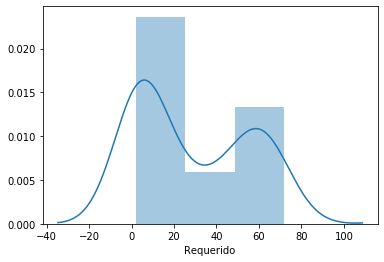

In [267]:
import seaborn as sns

sns.distplot(dic_23_int)

## 2da Prueba incluyendo varios archivos

In [252]:
path = '/Users/usuario/Documents/Base de Datos/Untitled Folder/pandas-master/Prueba AgentLoginLogOut/'

dirs = [os.path.join(path, d) for d in os.listdir(path) if d.endswith('12.csv')]

log_2=[]

for x in dirs:
    if x.endswith('2212.csv'):
        log_2.append(pd.read_csv(x, delimiter=';', skipfooter=2, engine='python', skiprows=1, header=None))
    else:
        log_2.append(pd.read_csv(x, delimiter=',', skipfooter=2, engine='python', skiprows=1, header=None))

df = pd.concat(log_2, ignore_index=True)

df.reset_index(inplace=True)
df.drop(labels=['index', 0, 3], axis='columns', inplace=True)
df.columns = ['Tenant Name', 'Agent Name', 'Start Timestamp', 'End Timestamp', 'Active Time']
df.head()

,Tenant Name,Agent Name,Start Timestamp,End Timestamp,Active Time
0,RAMOS RIVERAS,JUAN ALEXANDER (JARAMOSR),22-12-2019 8:06,22-12-2019 10:05,7150
1,LOPEZ CONTRERAS,PABLO HERNAN (PHLOPEZC),22-12-2019 20:09,22-12-2019 21:30,4835
2,LOPEZ CONTRERAS,PABLO HERNAN (PHLOPEZC),22-12-2019 16:54,22-12-2019 19:36,9685
3,LOPEZ CONTRERAS,PABLO HERNAN (PHLOPEZC),22-12-2019 16:20,22-12-2019 16:53,2019
4,ARAYA ALQUINTA,NICOL ALEXANDRA (NAARAYAA),22-12-2019 3:02,22-12-2019 6:13,11432


In [255]:
df.isnull().sum()

Tenant Name        0
Agent Name         0
Start Timestamp    0
End Timestamp      0
Active Time        0
dtype: int64

### Limpieza

In [269]:
df['Tenant Name'] = df['Tenant Name'].str.replace('ï¿½', 'Ñ')

df['Start Timestamp'] = pd.to_datetime(df['Start Timestamp'])
df['End Timestamp'] = pd.to_datetime(df['End Timestamp'])

df['fecha_inicio'] = df['Start Timestamp'].dt.date
df['tiempo_inicio'] = df['Start Timestamp'].dt.time
df['fecha_cierre'] = df['End Timestamp'].dt.date
df['tiempo_cierre'] = df['End Timestamp'].dt.time

df['Intervalo'] = df['Start Timestamp'].dt.floor('30min')
df['users'] = df['Agent Name'].str.extract(r'(?<=.\()(\w+)')

columns = ['Agent Name', 'Tenant Name', 'users','Active Time', 'Start Timestamp', 'fecha_inicio', 'tiempo_inicio', 'End Timestamp', 'fecha_cierre', 'tiempo_cierre', 'Intervalo']
df = df.reindex(columns=columns)


In [286]:
df.head()

,Agent Name,Tenant Name,users,Active Time,Start Timestamp,fecha_inicio,tiempo_inicio,End Timestamp,fecha_cierre,tiempo_cierre,Intervalo
0,JUAN ALEXANDER (JARAMOSR),RAMOS RIVERAS,JARAMOSR,7150,2019-12-22 08:06:00,2019-12-22,08:06:00,2019-12-22 10:05:00,2019-12-22,10:05:00,2019-12-22 08:00:00
1,PABLO HERNAN (PHLOPEZC),LOPEZ CONTRERAS,PHLOPEZC,4835,2019-12-22 20:09:00,2019-12-22,20:09:00,2019-12-22 21:30:00,2019-12-22,21:30:00,2019-12-22 20:00:00
2,PABLO HERNAN (PHLOPEZC),LOPEZ CONTRERAS,PHLOPEZC,9685,2019-12-22 16:54:00,2019-12-22,16:54:00,2019-12-22 19:36:00,2019-12-22,19:36:00,2019-12-22 16:30:00
3,PABLO HERNAN (PHLOPEZC),LOPEZ CONTRERAS,PHLOPEZC,2019,2019-12-22 16:20:00,2019-12-22,16:20:00,2019-12-22 16:53:00,2019-12-22,16:53:00,2019-12-22 16:00:00
4,NICOL ALEXANDRA (NAARAYAA),ARAYA ALQUINTA,NAARAYAA,11432,2019-12-22 03:02:00,2019-12-22,03:02:00,2019-12-22 06:13:00,2019-12-22,06:13:00,2019-12-22 03:00:00


In [278]:
dict_intervalo_2 = {}

filtro = df[['Intervalo', 'Active Time']].values

#Debo crear primero el diccionario con los intervalos como keys  

for j in filtro:
    if j[0] in dict_intervalo_2.keys():
        dict_intervalo_2[j[0]] += pd.to_timedelta(0, unit='s')
    else:
        dict_intervalo_2[j[0]] = pd.to_timedelta(0, unit='s')
        
print(pd.Series(dict_intervalo_2).sort_index())

2019-12-22 00:00:00   0 days
2019-12-22 03:00:00   0 days
2019-12-22 04:00:00   0 days
2019-12-22 05:00:00   0 days
2019-12-22 06:00:00   0 days
                       ...  
2019-12-23 20:00:00   0 days
2019-12-23 20:30:00   0 days
2019-12-23 21:00:00   0 days
2019-12-23 22:00:00   0 days
2019-12-23 22:30:00   0 days
Length: 71, dtype: timedelta64[ns]


In [279]:
filtro_2 = df[['Intervalo', 'Active Time', 'Start Timestamp', 'End Timestamp']]

for i, a, ti, tc in filtro_2.itertuples(index=False):
    
    #Declarando variables
    dif = tc - ti # Timedelta
    x = abs(t_seconds(ti)-t_seconds((i+timedelta(minutes=30)))) #Float
            
    if dif.total_seconds() < x :
        dict_intervalo_2[i] += dif
    else:
        while True:
            if abs((tc - i).total_seconds()) < 1800:
                break
            elif i not in dict_intervalo_2.keys() : 
                dict_intervalo_2[i] = pd.to_timedelta(0, unit='s')
            else:
                dict_intervalo_2[i] += pd.to_timedelta(x, unit='s') 
                i+= timedelta(minutes=30)
                if (i.hour != 23) & (i.minute != 30):
                    x = abs(t_seconds(i) - t_seconds((i+timedelta(minutes=30)))) #Float
                else:
                    x = 1800 # PENDIENTE
        if i not in dict_intervalo_2.keys() :
            #dict_intervalo[i] = pd.to_timedelta(0, unit='s')
            dict_intervalo_2[i] = tc - i
            
req_v1 = pd.Series(dict_intervalo_2, name='Requerido').sort_index()
req_v1 = req_v1.apply(lambda x : math.ceil((x.total_seconds()/3600))*2)

display(req_v1.head(), req_v1.tail())

2019-12-22 00:00:00    2
2019-12-22 00:30:00    2
2019-12-22 01:00:00    0
2019-12-22 03:00:00    2
2019-12-22 03:30:00    2
Name: Requerido, dtype: int64

2019-12-24 03:00:00    4
2019-12-24 03:30:00    4
2019-12-24 04:00:00    2
2019-12-24 04:30:00    2
2019-12-24 05:00:00    2
Name: Requerido, dtype: int64

In [303]:
req_dec = pd.read_excel('Req_diciembre.xlsx', sheet_name='Holdtech', skiprows=3, header=0, index_col=0, usecols=range(34,65))
req_dec.dropna(inplace=True)
req_dec.tail()

,2019-12-01,2019-12-02,2019-12-03,2019-12-04,2019-12-05,2019-12-06,2019-12-07,2019-12-08,2019-12-09,2019-12-10,...,2019-12-21,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30
requerido,,,,,,,,,,,,,,,,,,,,,
21:30,15.2,24.8,23.8,25.8,25.8,23.8,16.2,15.2,24.8,23.8,...,16.2,15.2,24.8,23.8,10.0,24.8,22.8,16.2,15.2,25.8
22:00,12.6,21.2,19.2,21.2,21.2,20.2,15.2,12.6,21.2,19.2,...,15.2,12.6,21.2,20.2,8.0,21.2,19.2,15.2,12.6,22.8
22:30,10.6,17.2,15.2,17.2,17.2,18.2,12.6,10.6,17.2,15.2,...,12.6,10.6,17.2,16.2,7.0,17.2,18.2,12.6,10.6,18.2
23:00,7.6,10.6,10.6,12.6,12.6,16.2,10.6,7.6,10.6,10.6,...,9.6,7.6,10.6,11.6,5.0,12.6,15.2,9.6,7.6,11.6
23:30,7.6,8.6,9.6,10.6,10.6,15.2,8.6,7.6,8.6,9.6,...,8.6,7.6,8.6,9.6,4.0,10.6,15.2,8.6,7.6,8.6


In [327]:
real_24 = req_v1['2019/12/23'].values
req_24 = req_dec['2019/12/23'].values
display(type(real_24), real_24.shape, real_24, type(req_24), req_24.shape, req_24)

test = (real_24 / req_24)*100

resultado = pd.DataFrame(test, index=req_dec['2019/12/23'].index, columns=['2019/12/23'])
resultado

numpy.ndarray

(48,)

array([ 2,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 10, 20,
       34, 44, 48, 56, 58, 56, 62, 68, 68, 62, 62, 66, 60, 56, 66, 72, 64,
       62, 62, 60, 54, 48, 42, 44, 36, 28, 22, 20, 18, 14, 14],
      dtype=int64)

numpy.ndarray

(48,)

array([ 6. ,  5. ,  4. ,  3. ,  3. ,  3. ,  3. ,  3. ,  3. ,  3. ,  3. ,
        3. ,  3. ,  3. ,  3. , 11. , 14. , 21. , 31. , 38. , 43. , 46. ,
       48. , 50. , 51. , 50. , 50. , 51. , 51. , 51. , 50. , 49. , 49. ,
       48. , 47. , 47. , 49. , 49. , 48. , 44. , 44. , 37.4, 32.4, 24.8,
       21.2, 17.2, 10.6,  8.6])

,2019/12/23
requerido,
0:00,33.333333
0:30,80.000000
1:00,100.000000
1:30,133.333333
2:00,133.333333
2:30,133.333333
3:00,133.333333
3:30,133.333333
4:00,133.333333
